# Computer vision with YoloV8

**Author:** Guillaume EGU

## Overview 

This project implements a comprehensive SMS spam classification system using various machine learning algorithms and natural language processing techniques. The goal is to automatically distinguish between legitimate messages (ham) and spam messages using text analysis and feature engineering.

The dataset contains 5,574 SMS messages labeled as either 'ham' (legitimate) or 'spam'. This is a classic text classification problem that demonstrates the power of NLP preprocessing techniques combined with traditional machine learning algorithms.

**Data Source:** https://archive.ics.uci.edu/dataset/228/sms+spam+collection


## Project Objectives

1. **Data Exploration**: Analyze the distribution and characteristics of spam vs ham messages
2. **Text Preprocessing**: Implement a complete NLP pipeline including cleaning, tokenization, stopword removal, and lemmatization
3. **Feature Engineering**: Extract meaningful numerical features from text data using TF-IDF vectorization
4. **Model Comparison**: Evaluate multiple classification algorithms to find the best performer
5. **Performance Analysis**: Assess model performance using various metrics and visualizations

## Business Value

- **Automatic Filtering**: Reduce manual effort in identifying spam messages
- **User Experience**: Improve user satisfaction by reducing unwanted messages
- **Security**: Protect users from potentially malicious spam content
- **Scalability**: Process large volumes of messages efficiently

## Contents

- Import Libraries
- Functions
- EDA & Feature Engineering
- Data preprocessing
- Models :
  - Multinomial NB
  - Random Forest
  - K-nearest neighbors
  - Support Vector Machine
- Model Comparison & Analysis
- Conclusion

<hr>

### Import Libraries

Installation and importation of key libraries

<hr>

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install numpy
!pip install imblearn
!pip install xgboost
!pip install ultralytics

   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   -------------------------------------- - 1.0/1.1 MB 21.8 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 16.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/109.3 MB ? eta -:--:--
    --------------------------------------- 1.8/109.3 MB 57.8 MB/s eta 0:00:02
   - -------------------------------------- 3.8/109.3 MB 48.7 MB/s eta 0:00:03
   - -------------------------------------- 5.4/109.3 MB 43.1 MB/s eta 0:00:03
   -- ------------------------------------- 7.7/109.3 MB 44.5 MB/s eta 0:00:03
   --- ------------------------------------ 10.1/109.3 MB 46.4 MB/s eta 0:00:03
   ---- ----------------------------------- 11.7/109.3 MB 40.9 MB/s eta 0:00:03
   ----- ---------------------------------- 13.8/109.3 MB 43.7 MB/s eta 0:00:03
   ----- ---------------------------------- 16.2/109.3 MB 46.7 MB/s eta 0:00:02
   ------ --------------------------------- 18.4/109.3 MB 46.7 MB/s et

In [16]:
# Handle the data
import os
import random 
import pandas as pd
import numpy as np

# Visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from matplotlib.colors import ListedColormap

# Models
from PIL import Image
import yaml
from ultralytics import YOLO
from sklearn.metrics import precision_score, recall_score


<hr>

### Functions

These helper functions implement the core NLP preprocessing pipeline. Each function serves a specific purpose in transforming raw text into a format suitable for machine learning algorithms.

<hr>

<hr>

### Data Load

Cell for loading the data in a single dataframe.

<hr>

In [10]:
path_train = "./datasets/VehiclesDetectionDataset/train/images/"
path_val = "./datasets/VehiclesDetectionDataset/val/images/"
path_test = "./datasets/VehiclesDetectionDataset/test/images/"


yaml_content = f"""
test: {path_test}
train: {path_train}
val: {path_val}

nc: 5 
names: ['Ambulance', 'Bus', 'Car', 'Motorcycle', 'Truck']
"""
output_path= 'data.yaml'
with open(output_path, "w") as file:
    file.write(yaml_content)
print(f"YAML file has been saved to {output_path}")

YAML file has been saved to data.yaml


In [11]:
with open(output_path, 'r') as file:
    data = yaml.safe_load(file)
class_names = data['names']
print("Class names:", class_names )

Class names: ['Ambulance', 'Bus', 'Car', 'Motorcycle', 'Truck']


In [13]:
images_folder = './datasets/VehiclesDetectionDataset/train/images'
image_files = [f for f in os.listdir(images_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]
random_image = random.choice(image_files)
random_image_path = os.path.join(images_folder, random_image)
image = Image.open(random_image_path)
image_size = image.size
image_mode = image.mode
num_channels = image.layers if hasattr(image, 'layers') else len(image.getbands())
print(f"Random Image: {random_image}")
print(f"Image Size: {image_size}")
print(f"Image Mode (Channels): {image_mode}")
print(f"Number of Channels: {num_channels}")

Random Image: bf0fd1bb683dab7c_jpg.rf.e986a5e8e7b797395b3623cdc2a769a7.jpg
Image Size: (416, 416)
Image Mode (Channels): RGB
Number of Channels: 3


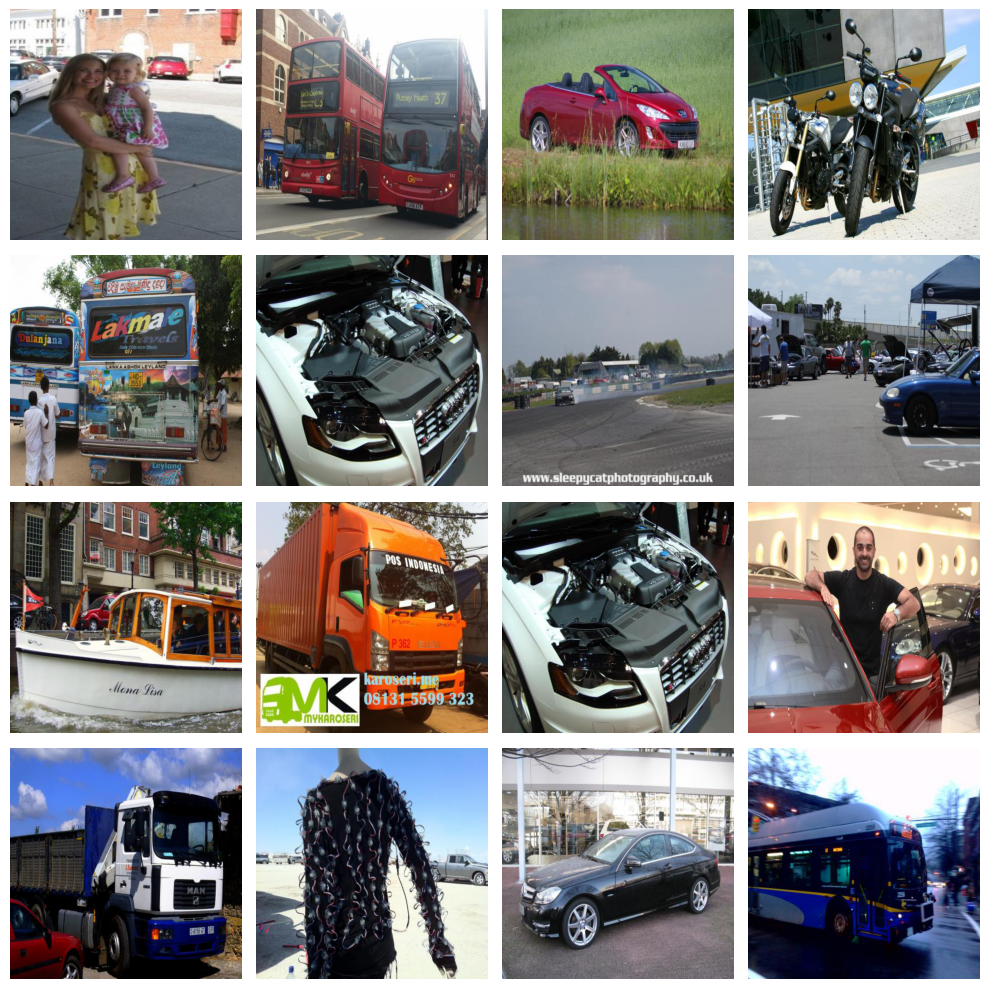

In [17]:
image_files = [f for f in os.listdir(path_train) if f.endswith('.jpg')]
selected_images = random.sample(image_files, 16)
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    img_path = os.path.join(path_train, selected_images[i])
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')
plt.tight_layout()
plt.show()

<hr>

### Exploratory Data Analysis (EDA) and Feature Engineering

In this crucial step, we explore the dataset to understand:

- **Data Distribution**: How many spam vs ham messages do we have?
- **Message Characteristics**: Are there patterns in message length, word count, etc.?
- **Class Imbalance**: Is the dataset balanced between spam and ham?
- **Feature Creation**: Can we engineer features that help distinguish spam from ham?

<hr>